In [1]:
# Test all the models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import sys
sys.path.insert(1, 'P:\DATA_OCT_22\Expert_Eye\Modeling')
from processing import *

In [2]:
# Importing the dataset
file_path = 'P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v6.csv'
df = pd.read_csv(file_path)
dataset = df.copy()
dataset.head()

,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006[S1],FROPCOM0006[S2],FROPCOM0006[S3],FROPCOM0006[S4],FROPCOM0006[S5],...,romberg_EyesClosed_SwayDensity,romberg_EyesOpen_LateralVariance,romberg_EyesClosed_LateralVariance,romberg_EyesOpen_Score,romberg_EyesClosed_Score,BMI,Weight_Diff,Frailty_Score,Frailty_State,MFESCALE_SCORE
0,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,1.0,...,29.880000,1.680999e-34,1.082434e-33,99.0,99.0,32.029086,-2.0,7,0,140.0
1,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,27.130802,1.338352e-03,1.246047e-02,98.0,88.0,28.906250,0.0,4,1,123.0
2,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,6.738724e-04,7.077824e-03,99.0,81.0,39.033376,0.0,9,0,135.0
3,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,29.880000,2.395301e-03,1.533375e-03,99.0,99.0,25.236340,2.0,7,0,129.0
4,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,2.942435e-03,2.505740e-03,99.0,99.0,22.460034,0.0,8,0,140.0


In [5]:
dataset.head()

,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006[S1],FROPCOM0006[S2],FROPCOM0006[S3],FROPCOM0006[S4],FROPCOM0006[S5],...,romberg_EyesClosed_SwayDensity,romberg_EyesOpen_LateralVariance,romberg_EyesClosed_LateralVariance,romberg_EyesOpen_Score,romberg_EyesClosed_Score,BMI,Weight_Diff,MFESCALE_SCORE,Frailty_Score,Frailty_State
0,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,1.0,...,29.880000,1.680999e-34,1.082434e-33,99.0,99.0,32.029086,-2.0,140.0,7,0
1,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,27.130802,1.338352e-03,1.246047e-02,98.0,88.0,28.906250,0.0,123.0,4,1
2,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,6.738724e-04,7.077824e-03,99.0,81.0,39.033376,0.0,135.0,9,0
3,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,29.880000,2.395301e-03,1.533375e-03,99.0,99.0,25.236340,2.0,129.0,7,0
4,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,2.942435e-03,2.505740e-03,99.0,99.0,22.460034,0.0,140.0,8,0


In [ ]:
# save the dataset 
dataset.to_csv('P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v6.csv', index=False)

In [2]:
# Splitting the dataset into the Training set and Test set
X = dataset.drop(columns=['Frailty_State', 'Frailty_Score'], axis=1).values
y = dataset['Frailty_State'].values

# Imputing missing values
X = processing(X, n_splits=3, k_values=[3, 5, 7, 9], verbose=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

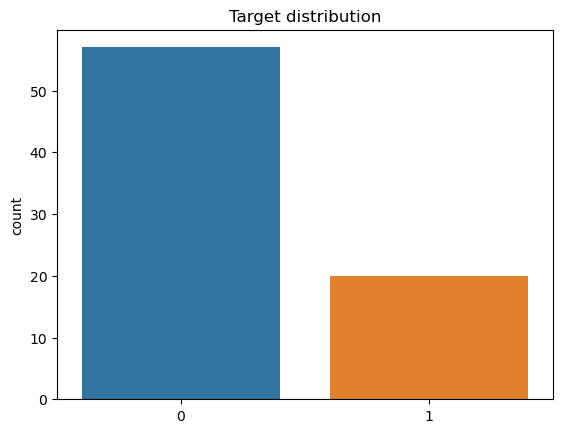

In [13]:
# Target  distribution plot
sns.countplot(x=y_train, data=dataset)
plt.title('Target distribution')
plt.show()


In [3]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}


for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_acc = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_prec = precision_score(y_train, y_train_pred, average='weighted')
    model_train_rec = recall_score(y_train, y_train_pred, average='weighted')

    # Test set performance
    model_test_acc = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_prec = precision_score(y_test, y_test_pred, average='weighted')
    model_test_rec = recall_score(y_test, y_test_pred, average='weighted')

    print(list(models.keys())[i])
    print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
    print('Training set accuracy: ', model_train_acc)
    print('Training set F1 score: ', model_train_f1)
    print('Training set precision: ', model_train_prec)
    print('Training set recall: ', model_train_rec)
    print('Training ROC AUC score: ', roc_auc_score(y_train, y_train_pred))

    print('_______________________________')

    print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
    print('Test set accuracy: ', model_test_acc)
    print('Test set F1 score: ', model_test_f1)
    print('Test set precision: ', model_test_prec)
    print('Test set recall: ', model_test_rec)
    print('Test ROC AUC score: ', roc_auc_score(y_test, y_test_pred))

    print('='*30)
    print('\n')

RandomForestClassifier
confusion matrix: 
 [[13  1]
 [ 3  3]]
Training set accuracy:  1.0
Training set F1 score:  1.0
Training set precision:  1.0
Training set recall:  1.0
Training ROC AUC score:  1.0
_______________________________
confusion matrix: 
 [[13  1]
 [ 3  3]]
Test set accuracy:  0.8
Test set F1 score:  0.7866666666666666
Test set precision:  0.79375
Test set recall:  0.8
Test ROC AUC score:  0.7142857142857143


BaggingClassifier
confusion matrix: 
 [[14  0]
 [ 3  3]]
Training set accuracy:  0.974025974025974
Training set F1 score:  0.974025974025974
Training set precision:  0.974025974025974
Training set recall:  0.974025974025974
Training ROC AUC score:  0.9662280701754385
_______________________________
confusion matrix: 
 [[14  0]
 [ 3  3]]
Test set accuracy:  0.85
Test set F1 score:  0.832258064516129
Test set precision:  0.8764705882352942
Test set recall:  0.85
Test ROC AUC score:  0.75


XGBClassifier
confusion matrix: 
 [[14  0]
 [ 3  3]]
Training set accuracy:  1

In [4]:
# Hyperparameter tuning for RandomForestClassifier
rf_params = {
    'n_estimators': [10, 30, 50, 100],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 12],
    'max_features': ['sqrt', 5, 10, 15, None],
}


In [12]:
# Hyperparameter tuning for BaggingClassifier
bg_params = {
    'n_estimators': [10, 30, 50, 100],
    'max_samples': [2, 4, 6, 8, 10],
    'max_features': ['sqrt', 5, 10, 15, None],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
} 


In [9]:
# list of models for hyperparameter tuning
gridsearch_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ("BG", BaggingClassifier(), bg_params)]
    



In [ ]:
# Use GridSearchCV to find the best hyperparameters
model_param = {}
for name, model, params in gridsearch_models:
    print(name)
    grid = GridSearchCV(model, params, cv=5, verbose=2, n_jobs=-1)
    grid.fit(X_train, y_train)
    model_param[name] = grid.best_params_

for model_name in model_param:
    print(f"--------- Best Parameters for {model_name} ---------")
    print(model_param[model_name])
    print("\n")
    


In [147]:
# Train model with best parameters
best_models = {

    'RandomForestClassifier': RandomForestClassifier(n_estimators=10, max_depth=10, max_features='sqrt', min_samples_split=8),
    'BaggingClassifier': BaggingClassifier(),
}

for i in range(len(list(best_models.values()))):
    model = list(best_models.values())[i]
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_name = list(models.keys())[i]

    # Training set performance
    model_train_acc = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_prec = precision_score(y_train, y_train_pred, average='weighted')
    model_train_rec = recall_score(y_train, y_train_pred, average='weighted')

    # Test set performance
    model_test_acc = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_prec = precision_score(y_test, y_test_pred, average='weighted')
    model_test_rec = recall_score(y_test, y_test_pred, average='weighted')

    print('Training set accuracy: ', model_train_acc)
    print('Training set F1 score: ', model_train_f1)
    print('Training set precision: ', model_train_prec)
    print('Training set recall: ', model_train_rec)
    print('Training ROC AUC score: ', roc_auc_score(y_train, y_train_pred))

    print('_______________________________')

    print('Test set accuracy: ', model_test_acc)
    print('Test set F1 score: ', model_test_f1)
    print('Test set precision: ', model_test_prec)
    print('Test set recall: ', model_test_rec)
    print('Test ROC AUC score: ', roc_auc_score(y_test, y_test_pred))

    print('='*30)
    print('\n')



Training set accuracy:  0.948051948051948
Training set F1 score:  0.9471327220873499
Training set precision:  0.9479296597940666
Training set recall:  0.948051948051948
Training ROC AUC score:  0.9162280701754385
_______________________________
Test set accuracy:  0.8
Test set F1 score:  0.7866666666666666
Test set precision:  0.79375
Test set recall:  0.8
Test ROC AUC score:  0.7142857142857143


Training set accuracy:  0.961038961038961
Training set F1 score:  0.95995895995896
Training set precision:  0.9629870129870131
Training set recall:  0.961038961038961
Training ROC AUC score:  0.925
_______________________________
Test set accuracy:  0.85
Test set F1 score:  0.832258064516129
Test set precision:  0.8764705882352942
Test set recall:  0.85
Test ROC AUC score:  0.75




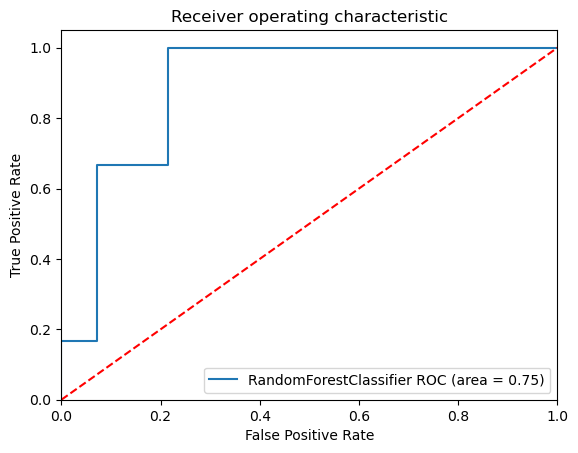

In [155]:

plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'RandomForestClassifier',
    'model': RandomForestClassifier(n_estimators=10, max_depth=10, max_features='sqrt', min_samples_split=8),
    'auc': roc_auc_score(y_test, y_test_pred)
},
]

# Create loot through models
for m in auc_models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test, y_pred)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], m['auc']))

# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [1]:
# Shap values
import shap

def shap_viz(model, X_test, title, target):
    
    #Prepare the features you want to evaluate
    my_features= list(dataset.drop(columns=['Frailty_State', 'Frailty_Score'], axis=1).columns)
    my_features_idx = [list(dataset.drop(columns=['Frailty_State', 'Frailty_Score'], axis=1).columns).index(x) for x in my_features]

    
    #Define your metric
    class_names = ['Frail)', 'not_frail_:(']

    #Load the SHAP explainer, since Random Forest is a decision tree, I used TreeExplainer
    explainer = shap.TreeExplainer(model)
    #We train the SHAP values on the features based on the validation set
    shap_values = explainer.shap_values(X_test.values)


    plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    shap.summary_plot(shap_values, X_test.values, plot_type='bar', class_names=class_names, feature_names=X_test.columns, max_display=20, show=False, plot_size=None)
    plt.title(f'{title} – Weight of the impact of each feature')

    plt.subplot(1,2,2)
    #shap_values[n] evaluates the impact of features for predicting satisfaction
    #n = 0 -- not happy, n = 1 -- happy
    shap.summary_plot(shap_values[1], X_test.values, feature_names=col_names, max_display=20, show=False,  plot_size=None)
    plt.title(f'{title} – Directional impact of each feature')
    plt.tight_layout()

    #To save a picture of your SHAP viz
    plt.savefig(f'{title}.png', bbox_inches='tight', dpi=100)

    plt.show()
  

    #To print a list of the top 10 most impactful features
    vals = np.abs(shap_values[0]).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_test.columns, vals)), columns=['col_name', 'feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
    for i in list(feature_importance.col_name.head(10)):
            print(i)
    return shap_values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


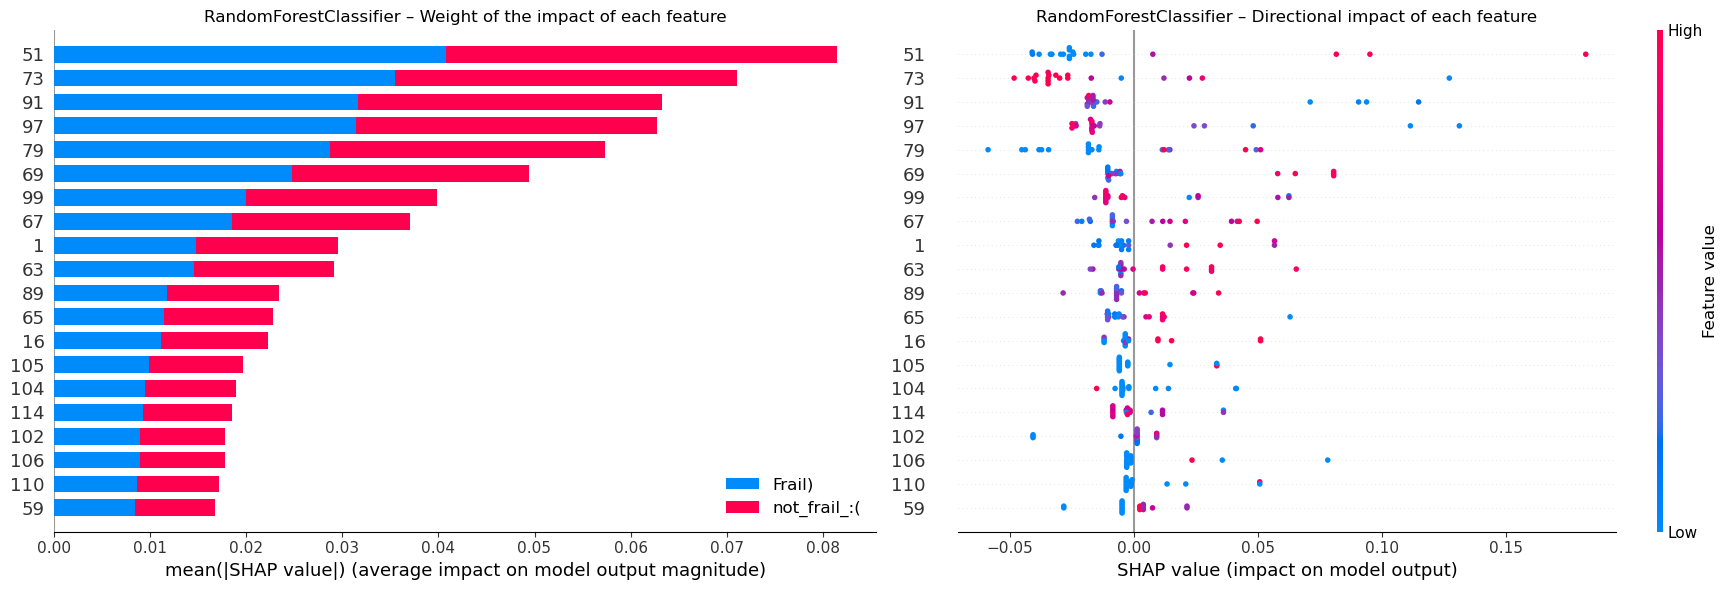

51
73
91
97
79
69
99
67
1
63


In [166]:
# Call the function
shap_values = shap_viz(model, X_test, 'RandomForestClassifier', dataset['Frailty_State'])

In [ ]:
# list of models for hyperparameter tuning
gridsearch_models = [
    CustomRandomForest(random_state=42),
    CustomXGBoost()
]

def run_grid_search(model, params, X, y):
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='recall')
    grid_search.fit(X, y)
    
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best score for {model.__class__.__name__}: {grid_search.best_score_}")

for model_name, model in models.items():
    print(f"Performing GridSearch on {model_name}...")
    params = param_grids.get(model_name, {})
    run_grid_search(model, params, X_train, y_train)